In [37]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data Preparation

In [6]:
# path of data 
path = 'Automobile_Data.csv'  # I changed the file name
df = pd.read_csv(path)

# cleaning the data here
#  replacing '?' to None value
df.replace('?', np.nan, inplace=True)

# focus only on numerical variables
df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'], axis=1, inplace=True)

# showing dtypes
print(df.dtypes)

df.head()

symboling              int64
normalized-losses     object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-size            int64
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
# define necessary functions

# Function: filling missing data
def fill_missing(df: pd.DataFrame, cols: list, mode: str = 'mean'):
    """
    Based on the 'mode' argument, filling the missing values

    Paramters:
    - df: the original dataframe
    - cols: the column names that will fill missing data
    - mode: either one of string: 'mean' or 'median'
    """
    # make sure that all columns are float types
    df[cols] = df[cols].astype(float)
    # fill missing data
    if mode == 'mean':
        df[cols] = df[cols].fillna(df[cols].mean())

    elif mode == 'median':
        df[cols] = df[cols].fillna(df[cols].median())

    else:
        pass

    return df

clern_df = fill_missing(df, list(df.columns))
clern_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [15]:
df_X, df_Y = df[['highway-mpg']], df['price']

# spliting df into train(70%) and test(30%) data
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=0.3, random_state=42)

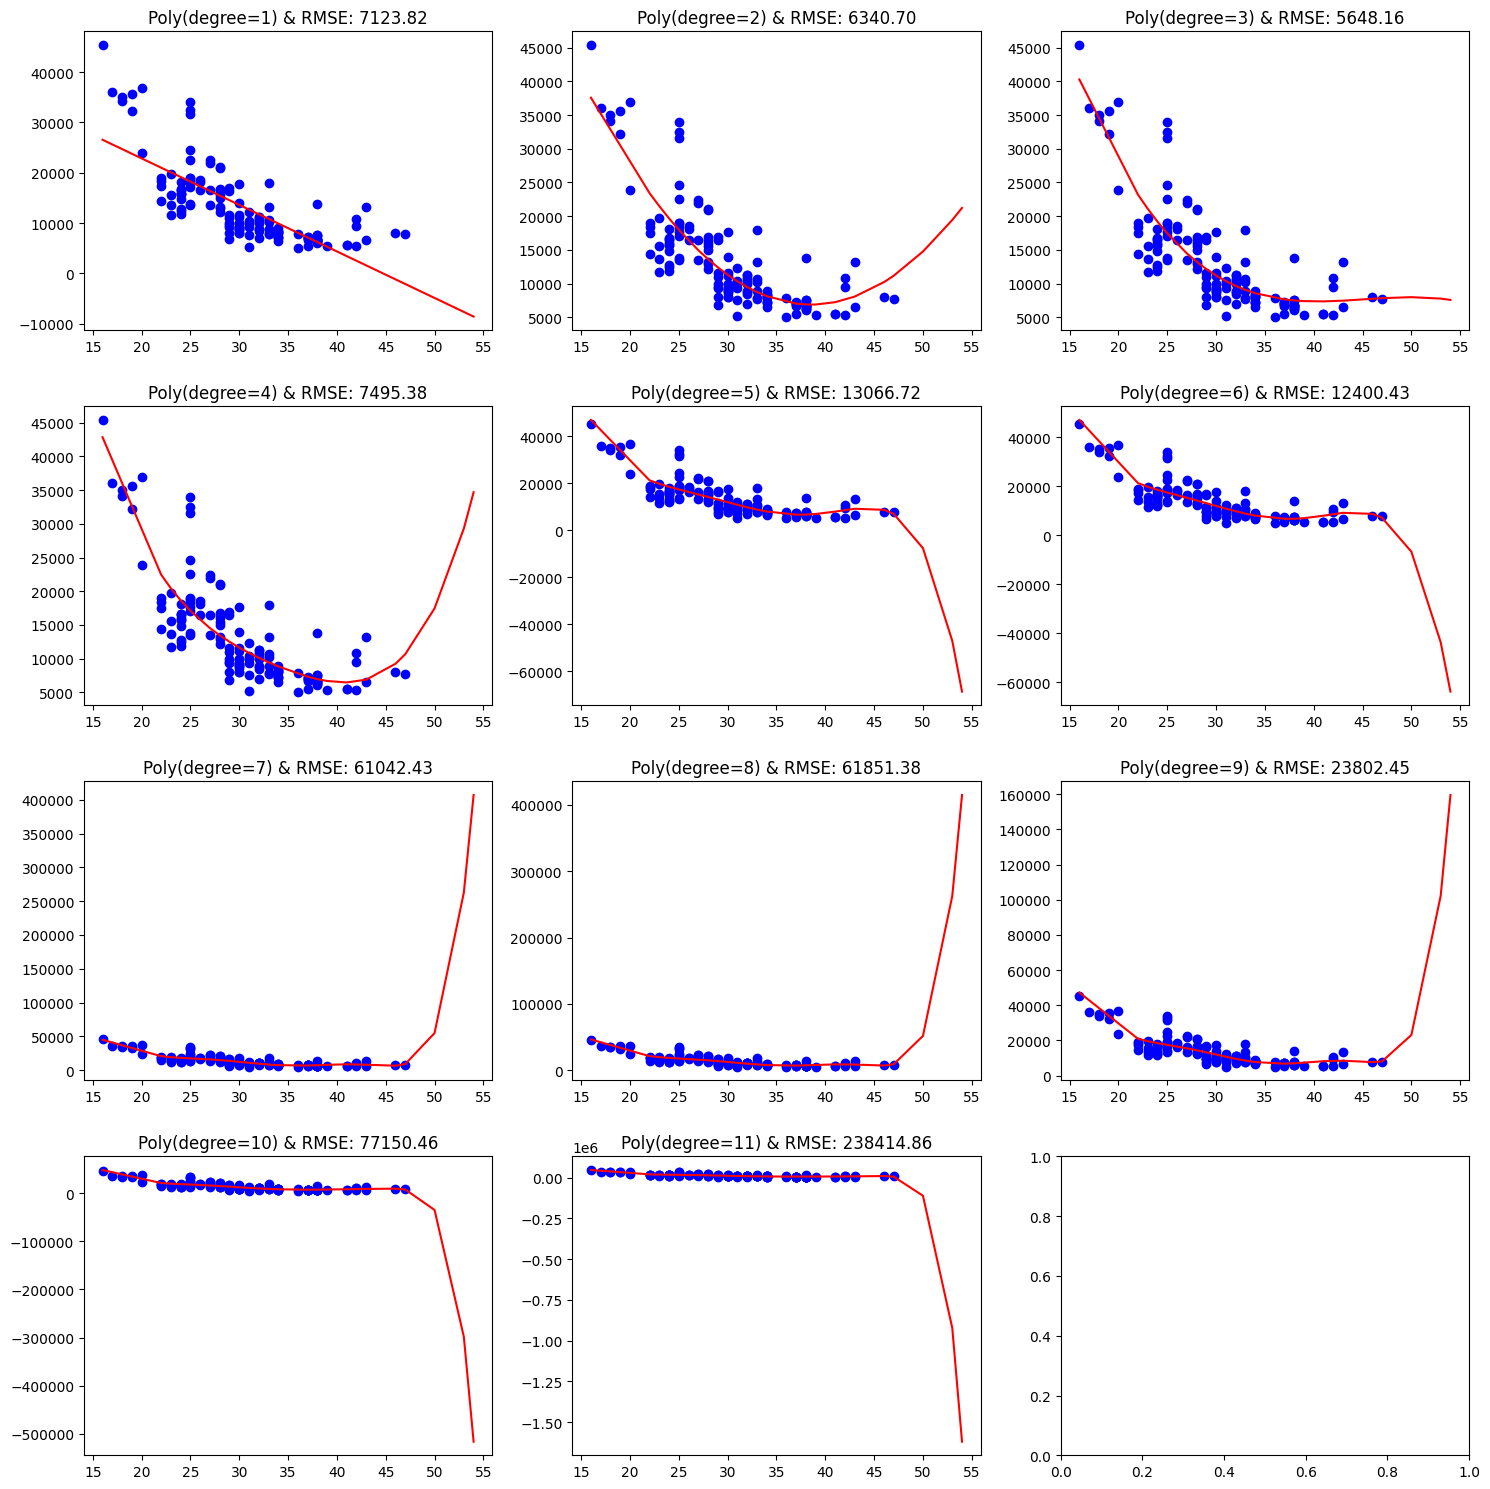

In [46]:
def multi_poly_degrees(X: pd.DataFrame, Y: pd.Series, degrees: int):
    # splitting train and test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

    fig, axs = plt.subplots(4, 3, figsize=(15, 15))  # Adjust the size as needed

    # traversing all degrees
    for d in range(degrees):
        # define object
        poly_regs = PolynomialFeatures(degree=d+1)
        # fit and transform
        X_poly = poly_regs.fit_transform(X_train)
        # define linear regression
        model = LinearRegression()
        # fitting data
        model.fit(X_poly, Y_train)
        # get predicted value
        X_test_transformed = poly_regs.fit_transform(X_test)
        Yhat = model.predict(X_test_transformed)

        # sort X_test and Yhat for plotting
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(X_test['highway-mpg'],Yhat), key=sort_axis)
        X_test_sorted, Yhat_sorted = zip(*sorted_zip)

        # calculate residuals
        res = [a - p for a, p in zip(Y_test, Yhat)]
        # calculate rmse
        rmse = (sum([r**2 for r in res]) / len(Yhat)) ** 0.5

        # visualization
        ax = axs[d // 3, d % 3]
        ax.scatter(X_train, Y_train, color='blue')
        ax.plot(X_test_sorted, Yhat_sorted, color='red')
        ax.set_title(f"Poly(degree={d+1}) & RMSE: {rmse:.2f}")

    plt.tight_layout()
    plt.show()

multi_poly_degrees(X=df[['highway-mpg']], Y=df['price'], degrees=11)